In [ ]:
# Jessica Gallo, Omar Guzman, Kevin Fremgen
# Created: 10/09/2020
# Last Modified:10/24/2020
# CSC767 Neural Networks and Deep Learning
# Classification and Prediction with DL Multilayered Perceptron
# 3b
'''
Normalize the dataset before you start training. Split the dataset into train, validate and test (70 % - 20% - 10%). 
Some datasets offer these three subsets, so you can use them directly as they are. Include the table and graphics 
presentations shown in the template for descriptive statistics (part 12. Classification). Use SGD with Nesterov Momentum. 
Choose activation function. Make experiments with dropout and dropout plus regularization (shown below) with red color. 
Evaluate test results using confusion matrix, classification report (precision, recall, f1-score, support, ROC/AUC and 
Precision-Recall curves). Except tables for this evaluation provide graphics of normalized confusion matrix, ROC/AUC curves. 
Add result analysis (not less than one page, font Times New Roman, size 11, single space.
'''

In [ ]:
# GPU CONFIGURATION
import tensorflow as tf 
print(tf.test.gpu_device_name())
import tensorflow
print(tensorflow.__version__)
import keras
print(keras.__version__)

In [ ]:
# Imports
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import  LinearDiscriminantAnalysis
from sklearn.naive_bayes import  GaussianNB
from sklearn.svm import SVC
import warnings
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, Normalizer
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import confusion_matrix, roc_curve, auc, roc_auc_score

In [3]:
# --------------------
# Poker Hand DATASET |
# -------------------
test = pd.read_csv('./Downloads/Poker-Hand-Dataset/poker-hand-testing.data', header=None)
test.columns = ['S1', 'C1','S2', 'C2','S3', 'C3','S4', 'C4','S5', 'C5','Poker Hand']

train = pd.read_csv('./Downloads/Poker-Hand-Dataset/poker-hand-training-true.data', header=None)
train.columns = ['S1', 'C1','S2', 'C2','S3', 'C3','S4', 'C4','S5', 'C5','Poker Hand']

print("Training Set: \n", train.head())
print("Testing Set: \n", test.head())

Training Set: 
    S1  C1  S2  C2  S3  C3  S4  C4  S5  C5  Poker Hand
0   1  10   1  11   1  13   1  12   1   1           9
1   2  11   2  13   2  10   2  12   2   1           9
2   3  12   3  11   3  13   3  10   3   1           9
3   4  10   4  11   4   1   4  13   4  12           9
4   4   1   4  13   4  12   4  11   4  10           9
Testing Set: 
    S1  C1  S2  C2  S3  C3  S4  C4  S5  C5  Poker Hand
0   1   1   1  13   2   4   2   3   1  12           0
1   3  12   3   2   3  11   4   5   2   5           1
2   1   9   4   6   1   4   3   2   3   9           1
3   1   4   3  13   2  13   2   1   3   6           1
4   3  10   2   7   1   2   2  11   4   9           0


In [4]:
print(train.shape)
print(test.shape)

(25010, 11)
(1000000, 11)


In [5]:
print("TRAIN:\n", train.describe())
print("\nTEST:\n", test.describe())

TRAIN:
                  S1            C1            S2            C2            S3  \
count  25010.000000  25010.000000  25010.000000  25010.000000  25010.000000   
mean       2.508756      6.995242      2.497721      7.014194      2.510236   
std        1.116483      3.749805      1.121767      3.766974      1.123148   
min        1.000000      1.000000      1.000000      1.000000      1.000000   
25%        2.000000      4.000000      1.000000      4.000000      2.000000   
50%        3.000000      7.000000      2.000000      7.000000      3.000000   
75%        4.000000     10.000000      4.000000     10.000000      4.000000   
max        4.000000     13.000000      4.000000     13.000000      4.000000   

                 C3            S4            C4            S5            C5  \
count  25010.000000  25010.000000  25010.000000  25010.000000  25010.000000   
mean       7.014154      2.495922      6.942463      2.497321      6.962735   
std        3.744974      1.116009      3.74

In [6]:
train.groupby('Poker Hand').size()

Poker Hand
0    12493
1    10599
2     1206
3      513
4       93
5       54
6       36
7        6
8        5
9        5
dtype: int64

In [7]:
test.groupby('Poker Hand').size()

Poker Hand
0    501209
1    422498
2     47622
3     21121
4      3885
5      1996
6      1424
7       230
8        12
9         3
dtype: int64

In [8]:
# -----------------------
# Box and Whisker Plots |
# ----------------------

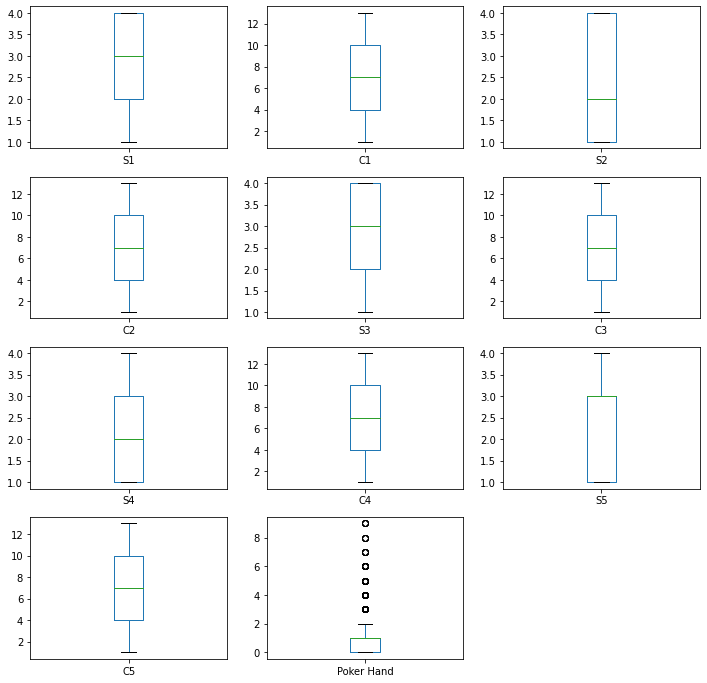

In [9]:
train.plot(kind = 'box', subplots = True, layout = (4,3), figsize=(12,12))
pyplot.show()

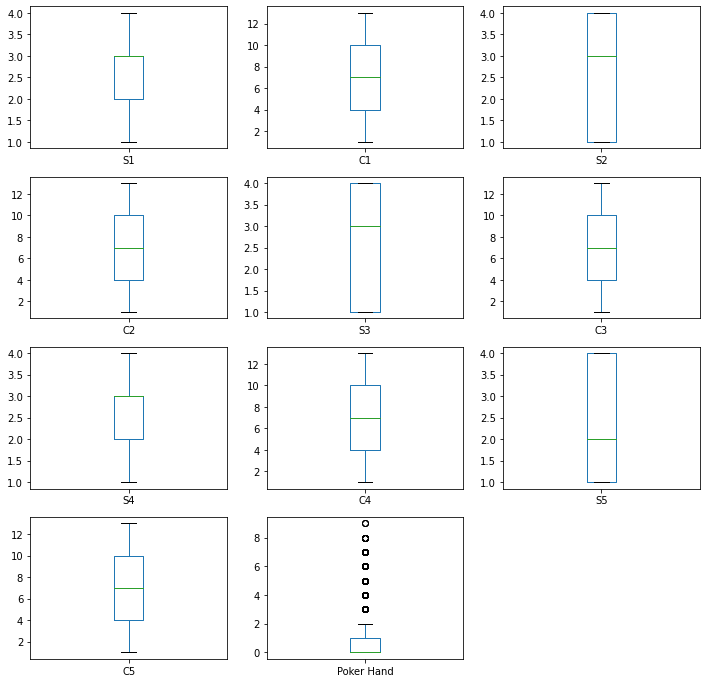

In [10]:
test.plot(kind = 'box', subplots = True, layout = (4,3), figsize=(12,12))
pyplot.show()

In [11]:
# ------------
# Histograms |
# -----------

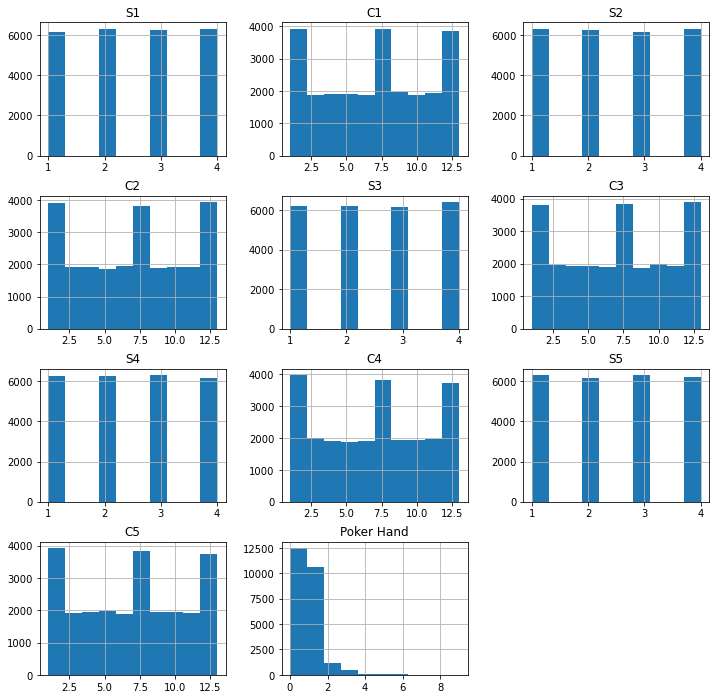

In [12]:
train.hist(layout= (4,3),figsize=(12,12))
pyplot.show()

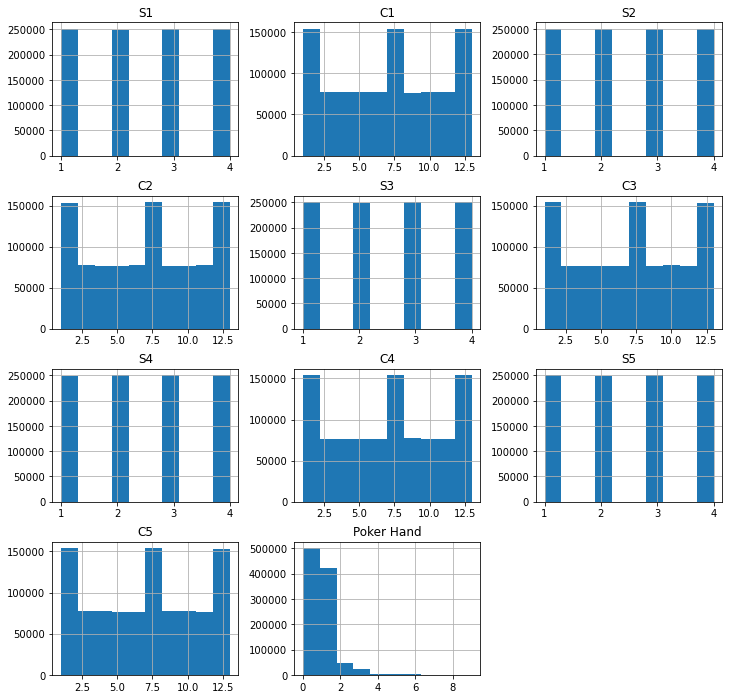

In [13]:
test.hist(layout= (4,3),figsize=(12,12))
pyplot.show()

In [14]:
# --------------
# Scatter Plot |
# -------------

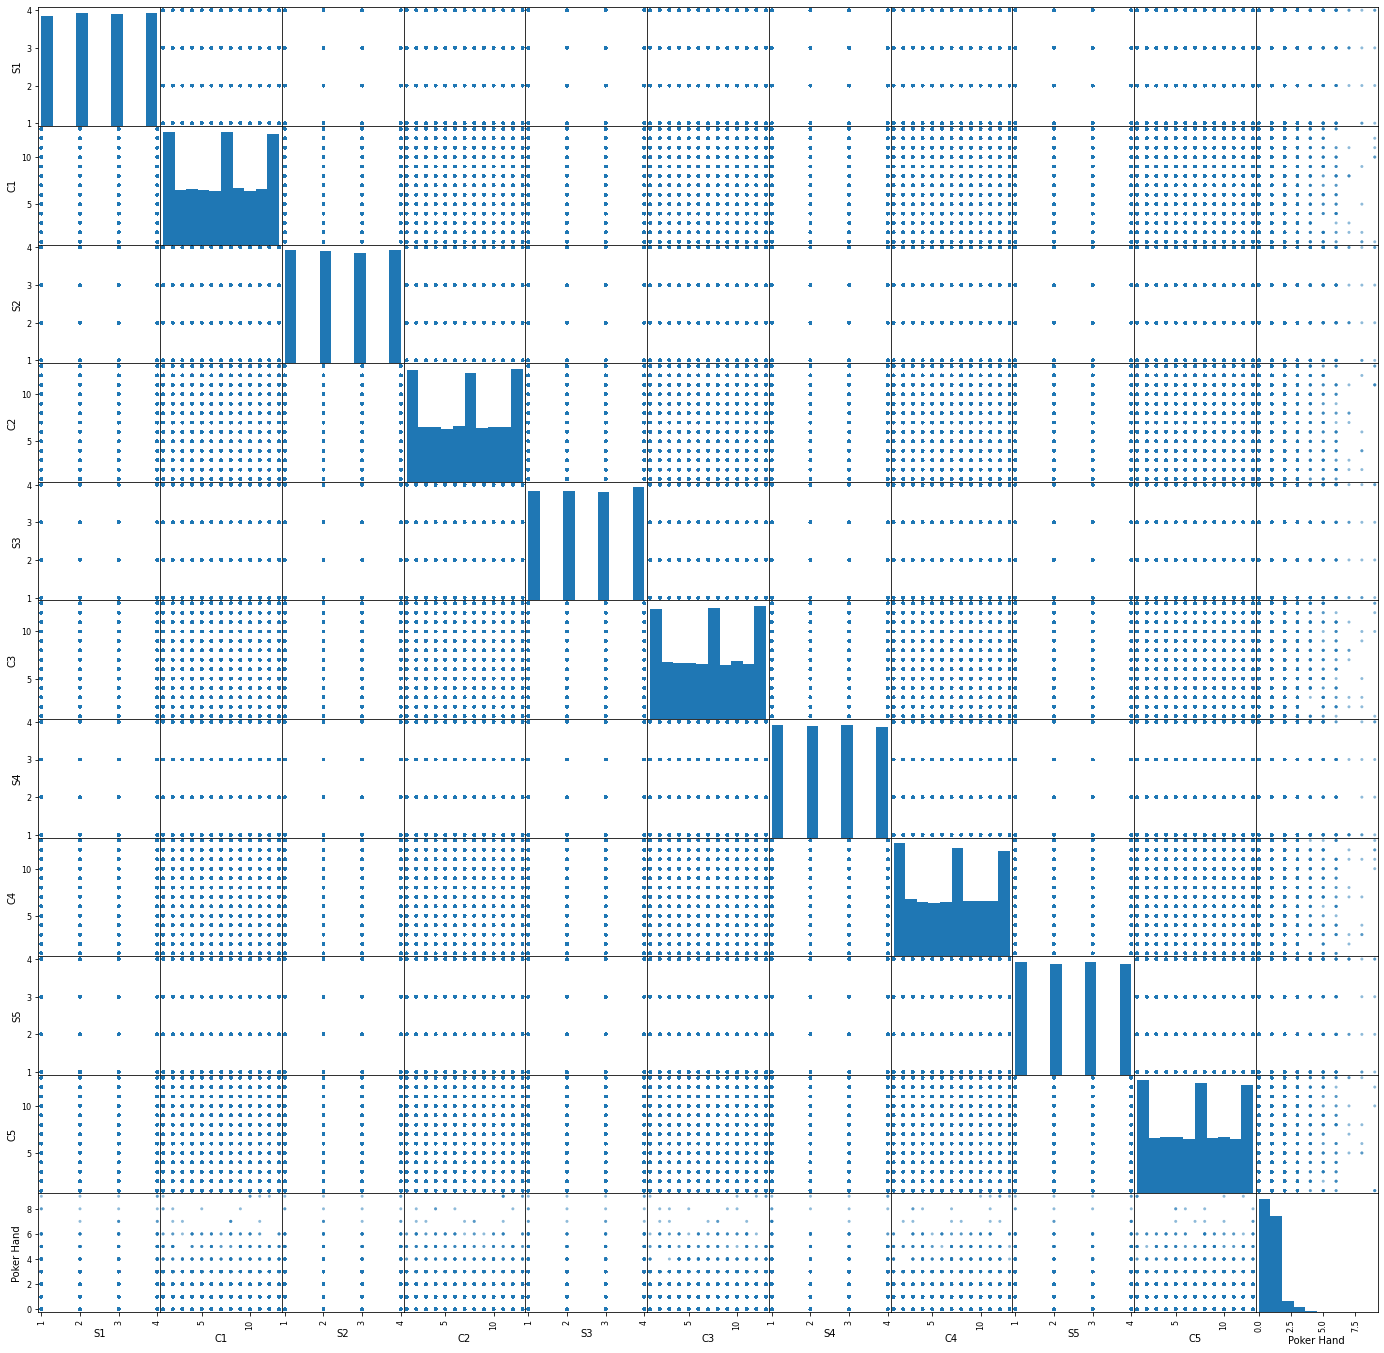

In [15]:
scatter_matrix(train, figsize=(24,24))
pyplot.show()

In [16]:
#scatter_matrix(test, figsize=(24,24))
#pyplot.show()

In [17]:
train.dtypes

S1            int64
C1            int64
S2            int64
C2            int64
S3            int64
C3            int64
S4            int64
C4            int64
S5            int64
C5            int64
Poker Hand    int64
dtype: object

In [18]:
test.dtypes

S1            int64
C1            int64
S2            int64
C2            int64
S3            int64
C3            int64
S4            int64
C4            int64
S5            int64
C5            int64
Poker Hand    int64
dtype: object

In [19]:
# ------------------------- 
# Creating validation set |
# ------------------------
array_train = train.values
X_Train = array_train[:,:-1]
Y_Train = array_train[:,10]


array_train = train.values
x_train = array_train[:,:-1]
y_train = array_train[:,10]

array_test = test.values
x_test = array_test[:,:-1]
y_test = array_test[:,10]
 
x_train, x_val, y_train, y_val = train_test_split(X_Train,Y_Train,test_size=0.2, random_state=1)

print("X_Train: ", X_Train)
print("Y_Train: ", Y_Train)
# Verify shape of trainers and validators
print("x_train: ", x_train.shape)
print("x_val: ", x_val.shape)
print("x_test: ", x_test.shape)
print("y_train: ", y_train.shape)
print("y_val: ", y_val.shape)
print("y_test: ", y_test.shape)

X_Train:  [[ 1 10  1 ... 12  1  1]
 [ 2 11  2 ... 12  2  1]
 [ 3 12  3 ... 10  3  1]
 ...
 [ 2  1  2 ...  1  4 13]
 [ 2 12  4 ... 12  4  9]
 [ 1  7  3 ...  8  3  7]]
Y_Train:  [9 9 9 ... 1 1 1]
x_train:  (20008, 10)
x_val:  (5002, 10)
x_test:  (1000000, 10)
y_train:  (20008,)
y_val:  (5002,)
y_test:  (1000000,)


In [20]:
print("x_train:\n", x_train)
print("y_train:\n", y_train)
print("x_test:\n", x_test)
print("y_test:\n", y_test)
print("x_val:\n", x_val)
print("y_val:\n", y_val)

x_train:
 [[ 4 13  2 ... 12  1 11]
 [ 4  9  4 ... 13  4  8]
 [ 2  9  3 ... 10  3  4]
 ...
 [ 4  8  1 ...  5  3  9]
 [ 1  4  1 ... 12  4  4]
 [ 4 10  3 ...  2  1 11]]
y_train:
 [2 0 0 ... 1 1 0]
x_test:
 [[ 1  1  1 ...  3  1 12]
 [ 3 12  3 ...  5  2  5]
 [ 1  9  4 ...  2  3  9]
 ...
 [ 1 11  4 ... 13  2  7]
 [ 3 11  1 ... 13  2  8]
 [ 2  5  2 ...  3  3  3]]
y_test:
 [0 1 1 ... 1 1 2]
x_val:
 [[ 4  3  2 ...  3  3 10]
 [ 4 13  3 ...  6  3  3]
 [ 2 12  1 ...  1  3  6]
 ...
 [ 1 10  2 ...  1  1  3]
 [ 3  7  1 ...  6  1 10]
 [ 3  3  1 ...  6  3  5]]
y_val:
 [3 1 1 ... 0 1 1]


In [21]:
print("x_train dtype: ", x_train.dtype)
print("y_train dtype: ", y_train.dtype)
print("x_test dtype: ", x_test.dtype)
print("y_test dtype: ", y_test.dtype)
print("x_val dtype: ", x_val.dtype)
print("y_val dtype: ", y_val.dtype)

x_train dtype:  int64
y_train dtype:  int64
x_test dtype:  int64
y_test dtype:  int64
x_val dtype:  int64
y_val dtype:  int64


In [22]:
# ===============
# Normalization |
# ==============

In [23]:
# ----------------
#  STANDARDSCALER |
# ----------------
# Computes mean and standard deviation on a training set so as to be able to later
# reapply the same transformation on the testing set.
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

print("\nStandardScalar:"
      "\n==============="
      "\nX_train:", x_train)
print('\nX_test:', x_test)


StandardScalar:
X_train: [[ 1.33307142  1.60288009 -0.44707386 ...  1.35335255 -1.33715404
   1.08329261]
 [ 1.33307142  0.5355825   1.33587488 ...  1.62063263  1.34896825
   0.28099819]
 [-0.45766294  0.5355825   0.44440051 ...  0.81879238  0.45359415
  -0.7887277 ]
 ...
 [ 1.33307142  0.2687581  -1.33854823 ... -0.51760802  0.45359415
   0.54842967]
 [-1.35303013 -0.79853949 -1.33854823 ...  1.35335255  1.34896825
  -0.7887277 ]
 [ 1.33307142  0.80240689  0.44440051 ... -1.31944827 -1.33715404
   1.08329261]]

X_test: [[-1.35303013 -1.59901268 -1.33854823 ... -1.05216818 -1.33715404
   1.35072408]
 [ 0.43770424  1.33605569  0.44440051 ... -0.51760802 -0.44177994
  -0.52129622]
 [-1.35303013  0.5355825   1.33587488 ... -1.31944827  0.45359415
   0.54842967]
 ...
 [-1.35303013  1.06923129  1.33587488 ...  1.62063263 -0.44177994
   0.01356672]
 [ 0.43770424  1.06923129 -1.33854823 ...  1.62063263 -0.44177994
   0.28099819]
 [-0.45766294 -0.53171509 -0.44707386 ... -1.05216818  0.453594

In [24]:
# --------------
#  MINMAXSCALAR |
# --------------
# Scaling features to lie between a given minimum and maximum value, often between 0 and 1
min_max_scaler = MinMaxScaler()
x_train = min_max_scaler.fit_transform(x_train)
x_test = min_max_scaler.transform(x_test)

print("\nMinMaxScalar:"
      "\n============="
      "\nX_train:", x_train)
print('\nX_test:', x_test)


MinMaxScalar:
X_train: [[1.         1.         0.33333333 ... 0.91666667 0.         0.83333333]
 [1.         0.66666667 1.         ... 1.         1.         0.58333333]
 [0.33333333 0.66666667 0.66666667 ... 0.75       0.66666667 0.25      ]
 ...
 [1.         0.58333333 0.         ... 0.33333333 0.66666667 0.66666667]
 [0.         0.25       0.         ... 0.91666667 1.         0.25      ]
 [1.         0.75       0.66666667 ... 0.08333333 0.         0.83333333]]

X_test: [[0.         0.         0.         ... 0.16666667 0.         0.91666667]
 [0.66666667 0.91666667 0.66666667 ... 0.33333333 0.33333333 0.33333333]
 [0.         0.66666667 1.         ... 0.08333333 0.66666667 0.66666667]
 ...
 [0.         0.83333333 1.         ... 1.         0.33333333 0.5       ]
 [0.66666667 0.83333333 0.         ... 1.         0.33333333 0.58333333]
 [0.33333333 0.33333333 0.33333333 ... 0.16666667 0.66666667 0.16666667]]


In [25]:
# --------------
#  ROBUSTSCALAR |
# --------------
# This removed the median and scaled the data according to the quantile range
robust_scaler = RobustScaler()
x_train = robust_scaler.fit_transform(x_train)
x_test = robust_scaler.transform(x_test)

print("\nRobustScalar:"
      "\n============="
      "\nX_train:", x_train)
print('\nX_test:', x_test)


RobustScalar:
X_train: [[ 0.5         1.         -0.33333333 ...  0.83333333 -1.
   0.66666667]
 [ 0.5         0.33333333  0.33333333 ...  1.          0.5
   0.16666667]
 [-0.5         0.33333333  0.         ...  0.5         0.
  -0.5       ]
 ...
 [ 0.5         0.16666667 -0.66666667 ... -0.33333333  0.
   0.33333333]
 [-1.         -0.5        -0.66666667 ...  0.83333333  0.5
  -0.5       ]
 [ 0.5         0.5         0.         ... -0.83333333 -1.
   0.66666667]]

X_test: [[-1.         -1.         -0.66666667 ... -0.66666667 -1.
   0.83333333]
 [ 0.          0.83333333  0.         ... -0.33333333 -0.5
  -0.33333333]
 [-1.          0.33333333  0.33333333 ... -0.83333333  0.
   0.33333333]
 ...
 [-1.          0.66666667  0.33333333 ...  1.         -0.5
   0.        ]
 [ 0.          0.66666667 -0.66666667 ...  1.         -0.5
   0.16666667]
 [-0.5        -0.33333333 -0.33333333 ... -0.66666667  0.
  -0.66666667]]


In [26]:
# --------------
#  NORMALIZER   |
# --------------
# Normalize samples individually to unit norm
# Each sample (each row of the data matrix) with at least one non zero component is rescaled
# indepentently o other samples so that its norm (|1 or |2) equals 1
normalizer_scaler = Normalizer()
x_train = normalizer_scaler.fit_transform(x_train)
x_test = normalizer_scaler.transform(x_test)

print("\nNormalizer:"
      "\n==========="
      "\nX_train:", x_train)
print('\nX_test:', x_test)


Normalizer:
X_train: [[ 0.20089486  0.40178972 -0.13392991 ...  0.33482477 -0.40178972
   0.26785981]
 [ 0.26013299  0.17342199  0.17342199 ...  0.52026598  0.26013299
   0.086711  ]
 [-0.34188173  0.22792115  0.         ...  0.34188173  0.
  -0.34188173]
 ...
 [ 0.3721042   0.12403473 -0.49613894 ... -0.24806947  0.
   0.24806947]
 [-0.49827288 -0.24913644 -0.33218192 ...  0.4152274   0.24913644
  -0.24913644]
 [ 0.26940795  0.26940795  0.         ... -0.44901326 -0.53881591
   0.3592106 ]]

X_test: [[-0.40544243 -0.40544243 -0.27029495 ... -0.27029495 -0.40544243
   0.33786869]
 [ 0.          0.45834925  0.         ... -0.1833397  -0.27500955
  -0.1833397 ]
 [-0.53033009  0.1767767   0.1767767  ... -0.44194174  0.
   0.1767767 ]
 ...
 [-0.56195149  0.37463432  0.18731716 ...  0.56195149 -0.28097574
   0.        ]
 [ 0.          0.31622777 -0.31622777 ...  0.47434165 -0.23717082
   0.07905694]
 [-0.36927447 -0.24618298 -0.24618298 ... -0.49236596  0.
  -0.49236596]]


In [27]:
# Spot-Check Algorithms
warnings.filterwarnings('ignore')
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=1)
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.502000 (0.010355)
LDA: 0.502000 (0.010355)
KNN: 0.513295 (0.008549)
CART: 0.477860 (0.017572)
NB: 0.501950 (0.010394)
SVM: 0.548580 (0.010231)


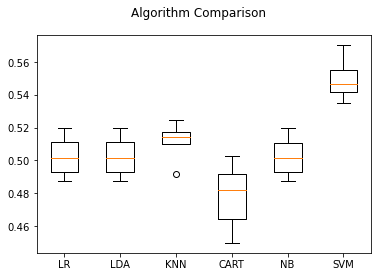

In [28]:
#Compare Algorithms
import matplotlib.pyplot as plt
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [29]:
# -------------
# Predictions |
# ------------

# Make predictions on validation dataset
for name, model in models:
    model.fit(x_train, y_train)
    predictions = model.predict(x_val)
    print("Accuracy Score:\n", accuracy_score(y_val, predictions))
    print("\n Confusion Matrix:\n", confusion_matrix(y_val, predictions))
    print("\nClassification Report:\n", classification_report(y_val, predictions))

Accuracy Score:
 0.021991203518592562

 Confusion Matrix:
 [[ 102    0    0    0  886   58    0  101 1302]
 [ 158    1    0    0  744   67    0   76 1116]
 [  16    0    0    0   73    6    0   13  131]
 [  12    0    0    0   28    4    0    4   58]
 [   2    0    0    0    4    0    0    0   15]
 [   0    0    0    0    4    0    0    0    6]
 [   1    0    0    0    4    0    0    1    4]
 [   0    0    0    0    0    0    0    1    1]
 [   0    0    0    0    1    0    0    0    2]]

Classification Report:
               precision    recall  f1-score   support

           0       0.35      0.04      0.07      2449
           1       1.00      0.00      0.00      2162
           2       0.00      0.00      0.00       239
           3       0.00      0.00      0.00       106
           4       0.00      0.19      0.00        21
           5       0.00      0.00      0.00        10
           6       0.00      0.00      0.00        10
           7       0.01      0.50      0.01       

In [30]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, predictions)

# Normalize
#cmn = cm.astype('float') / 
cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=target_names, yticklabels=target_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)

ValueError: Found input variables with inconsistent numbers of samples: [1000000, 5002]

In [31]:
# ROC Curve

from sklearn.preprocessing import label_binarize

y = label_binarize(y_test, classes = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
n_classes = y.shape

y_score = model.fit(x_train, y_train).decision_function(x_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

KeyboardInterrupt: 

In [32]:
# AUC ROC 

y_prob = model.predict_proba(x_test)

macro_roc_auc_ovo = roc_auc_score(y_test, y_prob, multi_class="ovo",
                                  average="macro")
weighted_roc_auc_ovo = roc_auc_score(y_test, y_prob, multi_class="ovo",
                                     average="weighted")
macro_roc_auc_ovr = roc_auc_score(y_test, y_prob, multi_class="ovr",
                                  average="macro")
weighted_roc_auc_ovr = roc_auc_score(y_test, y_prob, multi_class="ovr",
                                     average="weighted")
print("One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovo, weighted_roc_auc_ovo))
print("One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovr, weighted_roc_auc_ovr))

AttributeError: predict_proba is not available when  probability=False

In [ ]:
# ===================================================================================================
# 2. TOPOLOGY FOR MLP 
# ===================================================================================================
"""
DL MLP topology minimum requirements. The task is to train a machine learning algorithm to recognize 
a new sample from the test set correctly using feedforward Deep Learning Multilayered Perceptron 
(DLMLP). The block diagram is given here only for reference. The number of hidden layers should be 
not less than 5. Normalize the dataset you use. You choose the activation functions and the number of 
neurons in each layer. For weight initialization I suggest Glorot Normal.

NOTE: Use for the loss function categorical crossentropy (not binary crossentropy) and for the last 
layer - softmax it is a multiclass classification problem. Use for the number of neurons 64, 32, 32, 
…, #classes or 64, 48, 48, …, #classes. Set the #epochs to 30 – 40. Set the batch size to 64 or 128 
(if the total number of your dataset patterns is close or above 60000.


model = Squential()
model.add()
"""

In [ ]:
# ===================================================================================================
# 3b.
# Training, prediction. Use Sequential model, K-cross validation, mini-batches and mini-batch 
# normalization, plot the loss and accuracy curves for the cases (3a – 3c) specified below. Add 
# regularization and dropout to the model to prevent overfitting and check the performance again. 
# Get the predicted class. Evaluate the test results.
# ===================================================================================================

In [33]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [34]:
# SGD optimizer with Nesterov Momentum, 
# Glorot Normal weight, relu activation then softmax, 
# 40 epochs, batch size=128, 
# sprase_categorical_ crossentropy
# only dense layers
# 64, 32, 10

model = keras.Sequential()
model.add(layers.Dense(64, activation='relu', input_dim=10, kernel_initializer = 'glorot_normal'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                704       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_4 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_5 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_6 (Dense)              (None, 10)                3

In [35]:
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer=optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=True, name="SGD"), 
              metrics=['accuracy'])

In [36]:
history1 = model.fit(x_train, y_train, 
                    epochs = 40, 
                    batch_size = 128, 
                    verbose=1,
                    validation_data=(x_val,y_val),
                    shuffle=True)

Train on 20008 samples, validate on 5002 samples
Epoch 1/40
20008/20008 [==============================] - 5s 261us/sample - loss: 1.2103 - accuracy: 0.4844 - val_loss: 1.1291 - val_accuracy: 0.4312
Epoch 2/40
20008/20008 [==============================] - 2s 106us/sample - loss: 0.9881 - accuracy: 0.4975 - val_loss: 1.1972 - val_accuracy: 0.4318
Epoch 3/40
20008/20008 [==============================] - 2s 115us/sample - loss: 0.9845 - accuracy: 0.5030 - val_loss: 1.1134 - val_accuracy: 0.4332
Epoch 4/40
20008/20008 [==============================] - 2s 123us/sample - loss: 0.9834 - accuracy: 0.4990 - val_loss: 1.0875 - val_accuracy: 0.4624
Epoch 5/40
20008/20008 [==============================] - 2s 115us/sample - loss: 0.9809 - accuracy: 0.5088 - val_loss: 1.2665 - val_accuracy: 0.4310
Epoch 6/40
20008/20008 [==============================] - 2s 104us/sample - loss: 0.9765 - accuracy: 0.5149 - val_loss: 1.7243 - val_accuracy: 0.4322
Epoch 7/40
20008/20008 [===========================

In [37]:
# output validation loss and accuracy
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.9062864171447754
Test accuracy: 0.576316


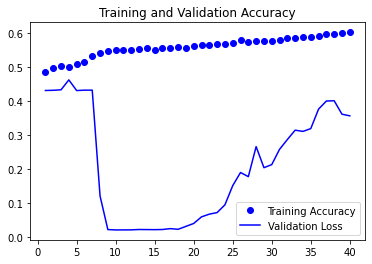

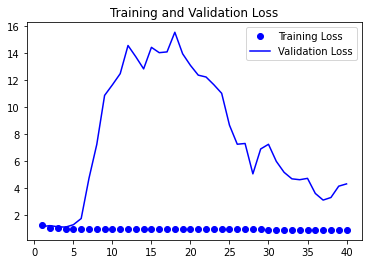

In [38]:
# -----------------------------------------------------
# DISPLAYING CURVES OF LOSS & ACCURACY DURING TRAINING |
# -----------------------------------------------------
import matplotlib.pyplot as plt

acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']
loss = history1.history['loss']
val_loss = history1.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Loss')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

In [39]:
# SGD optimizer with Nesterov Momentum, 
# Glorot Normal weight, relu activation then softmax, 
# 40 epochs, batch size=128, 
# no dropouts
# sparse_categorical_ crossentropy
# only dense layers
# 64, 48, 10
# 7 dense layers
# lr = 0.01

model2 = keras.Sequential()
model2.add(layers.Dense(64, activation='relu', input_dim=10, kernel_initializer = 'glorot_normal'))
model2.add(layers.Dense(48, activation='relu'))
model2.add(layers.Dense(48, activation='relu'))
model2.add(layers.Dense(48, activation='relu'))
model2.add(layers.Dense(48, activation='relu'))
model2.add(layers.Dense(48, activation='relu'))
model2.add(layers.Dense(10, activation='softmax'))
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 64)                704       
_________________________________________________________________
dense_8 (Dense)              (None, 48)                3120      
_________________________________________________________________
dense_9 (Dense)              (None, 48)                2352      
_________________________________________________________________
dense_10 (Dense)             (None, 48)                2352      
_________________________________________________________________
dense_11 (Dense)             (None, 48)                2352      
_________________________________________________________________
dense_12 (Dense)             (None, 48)                2352      
_________________________________________________________________
dense_13 (Dense)             (None, 10)               

In [40]:
model2.compile(loss='sparse_categorical_crossentropy', 
              optimizer=optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=True, name="SGD"), 
              metrics=['accuracy'])

In [41]:
history2 = model2.fit(x_train, y_train, 
                    epochs = 40, 
                    batch_size = 128, 
                    verbose=1,
                    validation_data=(x_val,y_val),
                    shuffle=True)

Train on 20008 samples, validate on 5002 samples
Epoch 1/40
20008/20008 [==============================] - 4s 201us/sample - loss: 1.1745 - accuracy: 0.4941 - val_loss: 1.1717 - val_accuracy: 0.4896
Epoch 2/40
20008/20008 [==============================] - 2s 104us/sample - loss: 0.9863 - accuracy: 0.4979 - val_loss: 1.2321 - val_accuracy: 0.4896
Epoch 3/40
20008/20008 [==============================] - 2s 106us/sample - loss: 0.9844 - accuracy: 0.5022 - val_loss: 1.1804 - val_accuracy: 0.4896
Epoch 4/40
20008/20008 [==============================] - 2s 106us/sample - loss: 0.9818 - accuracy: 0.5059 - val_loss: 1.0764 - val_accuracy: 0.4894
Epoch 5/40
20008/20008 [==============================] - 2s 112us/sample - loss: 0.9789 - accuracy: 0.5141 - val_loss: 1.0676 - val_accuracy: 0.4876
Epoch 6/40
20008/20008 [==============================] - 2s 112us/sample - loss: 0.9750 - accuracy: 0.5175 - val_loss: 1.1053 - val_accuracy: 0.4466
Epoch 7/40
20008/20008 [===========================

In [42]:
# output validation loss and accuracy
score = model2.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.9111324109649658
Test accuracy: 0.569095


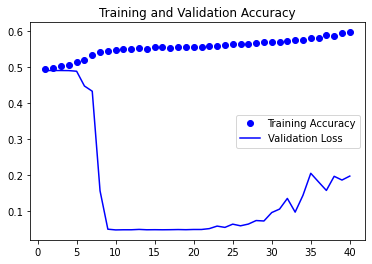

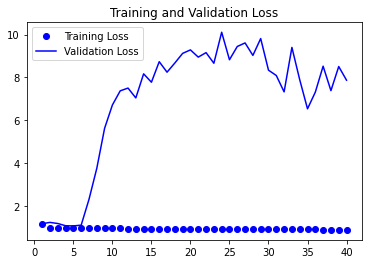

In [43]:
# -----------------------------------------------------
# DISPLAYING CURVES OF LOSS & ACCURACY DURING TRAINING |
# -----------------------------------------------------

acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']
loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Loss')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

In [44]:
# SGD optimizer with Nesterov Momentum, 
# Glorot Normal weight, relu activation then softmax, 
# 40 epochs, batch size=128, 
# 1 dropout
# dropout(4.0)
# sprase_categorical_ crossentropy
# 64, 48, 10
# 7 dense layers
# lr = 0.01

model3 = keras.Sequential()
model3.add(layers.Dense(64, activation='relu', input_dim=10, kernel_initializer = 'glorot_normal'))
model3.add(layers.Dense(48, activation='relu'))
model3.add(layers.Dense(48, activation='relu'))
model3.add(layers.Dense(48, activation='relu'))
model3.add(layers.Dense(48, activation='relu'))
model3.add(layers.Dropout(0.4))
model3.add(layers.Dense(48, activation='relu'))
model3.add(layers.Dense(48, activation='softmax'))
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 64)                704       
_________________________________________________________________
dense_15 (Dense)             (None, 48)                3120      
_________________________________________________________________
dense_16 (Dense)             (None, 48)                2352      
_________________________________________________________________
dense_17 (Dense)             (None, 48)                2352      
_________________________________________________________________
dense_18 (Dense)             (None, 48)                2352      
_________________________________________________________________
dropout (Dropout)            (None, 48)                0         
_________________________________________________________________
dense_19 (Dense)             (None, 48)               

In [45]:
model3.compile(loss='sparse_categorical_crossentropy', 
              optimizer=optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=True, name="SGD"), 
              metrics=['accuracy'])

In [46]:
history3 = model3.fit(x_train, y_train, 
                    epochs = 40, 
                    batch_size = 128, 
                    verbose=1,
                    validation_data=(x_val,y_val),
                    shuffle=True)

Train on 20008 samples, validate on 5002 samples
Epoch 1/40
20008/20008 [==============================] - 4s 200us/sample - loss: 1.4078 - accuracy: 0.4837 - val_loss: 1.3262 - val_accuracy: 0.4896
Epoch 2/40
20008/20008 [==============================] - 2s 115us/sample - loss: 1.0025 - accuracy: 0.4905 - val_loss: 1.3693 - val_accuracy: 0.4896
Epoch 3/40
20008/20008 [==============================] - 2s 114us/sample - loss: 0.9958 - accuracy: 0.4883 - val_loss: 1.2700 - val_accuracy: 0.4896
Epoch 4/40
20008/20008 [==============================] - 2s 110us/sample - loss: 0.9938 - accuracy: 0.4889 - val_loss: 1.2229 - val_accuracy: 0.4896
Epoch 5/40
20008/20008 [==============================] - 2s 114us/sample - loss: 0.9895 - accuracy: 0.4944 - val_loss: 1.2214 - val_accuracy: 0.4474
Epoch 6/40
20008/20008 [==============================] - 2s 111us/sample - loss: 0.9893 - accuracy: 0.4968 - val_loss: 1.2394 - val_accuracy: 0.4896
Epoch 7/40
20008/20008 [===========================

In [47]:
# output validation loss and accuracy
score = model3.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.9341195303516387
Test accuracy: 0.553521


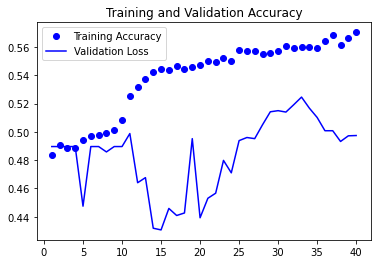

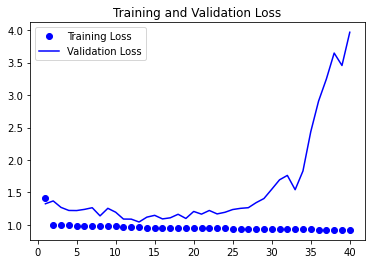

In [48]:
# -----------------------------------------------------
# DISPLAYING CURVES OF LOSS & ACCURACY DURING TRAINING |
# -----------------------------------------------------

acc = history3.history['accuracy']
val_acc = history3.history['val_accuracy']
loss = history3.history['loss']
val_loss = history3.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Loss')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

In [49]:
# SGD optimizer with Nesterov Momentum, 
# Glorot Normal weight, relu activation then softmax, 
# 40 epochs, batch size=128, 
# 2 dropouts (0.4)
# sparse_categorical_ crossentropy
# 7 dense layers
# lr = 0.01

model4 = keras.Sequential()
model4.add(layers.Dense(64, activation='relu', input_dim=10, kernel_initializer = 'glorot_normal'))
model4.add(layers.Dense(48, activation='relu'))
model4.add(layers.Dense(48, activation='relu'))
model4.add(layers.Dropout(0.4))
model4.add(layers.Dense(48, activation='relu'))
model4.add(layers.Dense(48, activation='relu'))
model4.add(layers.Dropout(0.4))
model4.add(layers.Dense(48, activation='relu'))
model4.add(layers.Dense(10, activation='softmax'))
model4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 64)                704       
_________________________________________________________________
dense_22 (Dense)             (None, 48)                3120      
_________________________________________________________________
dense_23 (Dense)             (None, 48)                2352      
_________________________________________________________________
dropout_1 (Dropout)          (None, 48)                0         
_________________________________________________________________
dense_24 (Dense)             (None, 48)                2352      
_________________________________________________________________
dense_25 (Dense)             (None, 48)                2352      
_________________________________________________________________
dropout_2 (Dropout)          (None, 48)               

In [50]:
model4.compile(loss='sparse_categorical_crossentropy', 
              optimizer=optimizers.SGD(learning_rate=0.01, momentum=0.0, nesterov=True, name="SGD"), 
              metrics=['accuracy'])

In [51]:
history4 = model4.fit(x_train, y_train, 
                    epochs = 40, 
                    batch_size = 128, 
                    verbose=1,
                    validation_data=(x_val,y_val),
                    shuffle=True)

Train on 20008 samples, validate on 5002 samples
Epoch 1/40
20008/20008 [==============================] - 4s 194us/sample - loss: 1.6673 - accuracy: 0.4952 - val_loss: 1.4690 - val_accuracy: 0.4896
Epoch 2/40
20008/20008 [==============================] - 2s 109us/sample - loss: 1.0799 - accuracy: 0.4933 - val_loss: 1.6259 - val_accuracy: 0.4896
Epoch 3/40
20008/20008 [==============================] - 2s 115us/sample - loss: 1.0358 - accuracy: 0.4904 - val_loss: 1.5052 - val_accuracy: 0.4896
Epoch 4/40
20008/20008 [==============================] - 2s 114us/sample - loss: 1.0187 - accuracy: 0.4921 - val_loss: 1.4024 - val_accuracy: 0.4896
Epoch 5/40
20008/20008 [==============================] - 2s 118us/sample - loss: 1.0093 - accuracy: 0.4926 - val_loss: 1.4102 - val_accuracy: 0.4896
Epoch 6/40
20008/20008 [==============================] - 2s 115us/sample - loss: 1.0022 - accuracy: 0.4952 - val_loss: 1.4006 - val_accuracy: 0.4896
Epoch 7/40
20008/20008 [===========================

In [52]:
# output validation loss and accuracy
score = model4.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.9795619590320587
Test accuracy: 0.501209


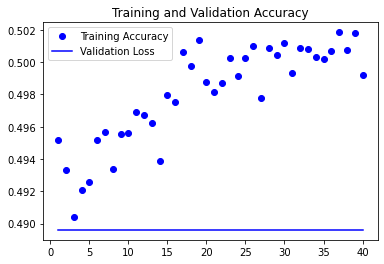

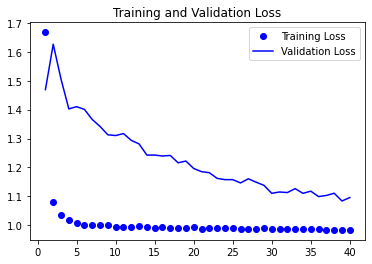

In [53]:
# -----------------------------------------------------
# DISPLAYING CURVES OF LOSS & ACCURACY DURING TRAINING |
# -----------------------------------------------------

acc = history4.history['accuracy']
val_acc = history4.history['val_accuracy']
loss = history4.history['loss']
val_loss = history4.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Loss')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

In [54]:
# SGD optimizer with Nesterov Momentum, 
# Glorot Normal weight, relu activation then softmax, 
# 40 epochs, batch size=128, 
# 2 dropouts(0.4), 1 regularization 
# sparse_categorical_ crossentropy
# 7 dense layers
# lr = 0.01

model5 = keras.Sequential()
model5.add(layers.Dense(64, activation='relu', input_dim=10, kernel_initializer = 'glorot_normal'))
model5.add(layers.Dense(48, activation='relu'))
model5.add(layers.BatchNormalization())
model5.add(layers.Dense(48, activation='relu'))
model5.add(layers.Dropout(0.4))
model5.add(layers.Dense(48, activation='relu'))
model5.add(layers.Dense(48, activation='relu'))
model5.add(layers.Dropout(0.4))
model5.add(layers.Dense(48, activation='relu'))
model5.add(layers.Dense(10, activation='softmax'))
model5.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 64)                704       
_________________________________________________________________
dense_29 (Dense)             (None, 48)                3120      
_________________________________________________________________
batch_normalization (BatchNo (None, 48)                192       
_________________________________________________________________
dense_30 (Dense)             (None, 48)                2352      
_________________________________________________________________
dropout_3 (Dropout)          (None, 48)                0         
_________________________________________________________________
dense_31 (Dense)             (None, 48)                2352      
_________________________________________________________________
dense_32 (Dense)             (None, 48)               

In [55]:
model5.compile(loss='sparse_categorical_crossentropy', 
              optimizer=optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=True, name="SGD"), 
              metrics=['accuracy'])

In [56]:
history5 = model5.fit(x_train, y_train, 
                    epochs = 40, 
                    batch_size = 128, 
                    verbose=1,
                    validation_data=(x_val,y_val),
                    shuffle=True)

Train on 20008 samples, validate on 5002 samples
Epoch 1/40
20008/20008 [==============================] - 6s 289us/sample - loss: 1.0989 - accuracy: 0.4741 - val_loss: 1.0594 - val_accuracy: 0.4896
Epoch 2/40
20008/20008 [==============================] - 3s 134us/sample - loss: 0.9919 - accuracy: 0.4925 - val_loss: 1.2067 - val_accuracy: 0.4896
Epoch 3/40
20008/20008 [==============================] - 3s 132us/sample - loss: 0.9801 - accuracy: 0.5075 - val_loss: 1.5439 - val_accuracy: 0.4896
Epoch 4/40
20008/20008 [==============================] - 3s 135us/sample - loss: 0.9758 - accuracy: 0.5137 - val_loss: 2.0466 - val_accuracy: 0.4896
Epoch 5/40
20008/20008 [==============================] - 3s 134us/sample - loss: 0.9707 - accuracy: 0.5234 - val_loss: 2.0199 - val_accuracy: 0.4904
Epoch 6/40
20008/20008 [==============================] - 3s 132us/sample - loss: 0.9681 - accuracy: 0.5251 - val_loss: 2.4538 - val_accuracy: 0.4896
Epoch 7/40
20008/20008 [===========================

In [57]:
# output validation loss and accuracy
score = model5.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.9779555314502716
Test accuracy: 0.475817


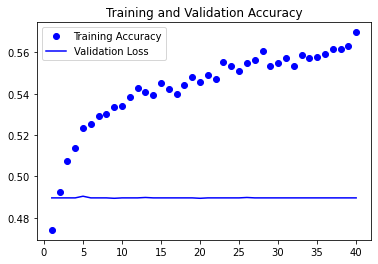

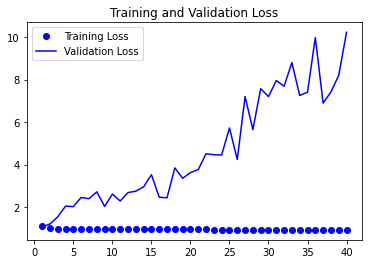

In [58]:
# -----------------------------------------------------
# DISPLAYING CURVES OF LOSS & ACCURACY DURING TRAINING |
# -----------------------------------------------------

acc = history5.history['accuracy']
val_acc = history5.history['val_accuracy']
loss = history5.history['loss']
val_loss = history5.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Loss')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

In [59]:
# SGD optimizer with Nesterov Momentum, 
# Glorot Normal weight, relu activation then softmax, 
# 40 epochs, batch size=128, 
# 1 dropouts(0.4), 2 regularization 
# sparse_categorical_ crossentropy
# 7 dense layers
# lr = 0.01

model6 = keras.Sequential()
model6.add(layers.Dense(64, activation='relu', input_dim=10, kernel_initializer = 'glorot_normal'))
model6.add(layers.Dense(48, activation='relu'))
model6.add(layers.BatchNormalization())
model6.add(layers.Dense(48, activation='relu'))
model6.add(layers.BatchNormalization())
model6.add(layers.Dense(48, activation='relu'))
model6.add(layers.Dense(48, activation='relu'))
model6.add(layers.Dropout(0.4))
model6.add(layers.Dense(48, activation='relu'))
model6.add(layers.Dense(10, activation='softmax'))
model6.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_35 (Dense)             (None, 64)                704       
_________________________________________________________________
dense_36 (Dense)             (None, 48)                3120      
_________________________________________________________________
batch_normalization_1 (Batch (None, 48)                192       
_________________________________________________________________
dense_37 (Dense)             (None, 48)                2352      
_________________________________________________________________
batch_normalization_2 (Batch (None, 48)                192       
_________________________________________________________________
dense_38 (Dense)             (None, 48)                2352      
_________________________________________________________________
dense_39 (Dense)             (None, 48)               

In [60]:
model6.compile(loss='sparse_categorical_crossentropy', 
              optimizer=optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=True, name="SGD"), 
              metrics=['accuracy'])

In [61]:
history6 = model6.fit(x_train, y_train, 
                    epochs = 40, 
                    batch_size = 128, 
                    verbose=1,
                    validation_data=(x_val,y_val),
                    shuffle=True)

Train on 20008 samples, validate on 5002 samples
Epoch 1/40
20008/20008 [==============================] - 6s 318us/sample - loss: 1.1295 - accuracy: 0.4728 - val_loss: 1.1663 - val_accuracy: 0.4760
Epoch 2/40
20008/20008 [==============================] - 3s 154us/sample - loss: 0.9805 - accuracy: 0.5137 - val_loss: 1.5567 - val_accuracy: 0.4916
Epoch 3/40
20008/20008 [==============================] - 3s 148us/sample - loss: 0.9717 - accuracy: 0.5234 - val_loss: 2.5946 - val_accuracy: 0.4902
Epoch 4/40
20008/20008 [==============================] - 3s 147us/sample - loss: 0.9632 - accuracy: 0.5342 - val_loss: 3.2701 - val_accuracy: 0.4698
Epoch 5/40
20008/20008 [==============================] - 3s 147us/sample - loss: 0.9604 - accuracy: 0.5374 - val_loss: 3.2746 - val_accuracy: 0.4644
Epoch 6/40
20008/20008 [==============================] - 3s 150us/sample - loss: 0.9567 - accuracy: 0.5400 - val_loss: 3.2259 - val_accuracy: 0.4598
Epoch 7/40
20008/20008 [===========================

In [62]:
# output validation loss and accuracy
score = model6.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.9658031035251617
Test accuracy: 0.52951


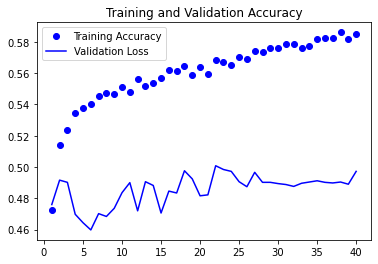

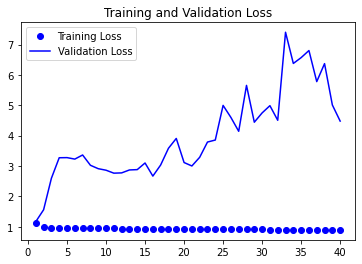

In [63]:
# -----------------------------------------------------
# DISPLAYING CURVES OF LOSS & ACCURACY DURING TRAINING |
# -----------------------------------------------------

acc = history6.history['accuracy']
val_acc = history6.history['val_accuracy']
loss = history6.history['loss']
val_loss = history6.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Loss')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

In [68]:
# SGD optimizer with Nesterov Momentum, 
# Glorot Normal weight, relu activation then softmax, 
# 40 epochs, batch size=128, 
# 1 dropouts, 2 regularization 
# sparse_categorical_ crossentropy
# 6 dense layers
# lr = 0.01

model8 = keras.Sequential()
model8.add(layers.Dense(64, activation='relu', input_dim=10, kernel_initializer = 'glorot_normal'))
model8.add(layers.BatchNormalization())
model8.add(layers.Dense(48, activation='relu'))
model8.add(layers.BatchNormalization())
model8.add(layers.Dense(48, activation='relu'))
model8.add(layers.Dense(48, activation='relu'))
model8.add(layers.Dropout(0.4))
model8.add(layers.Dense(48, activation='relu'))
model8.add(layers.Dense(10, activation='softmax'))
model8.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_49 (Dense)             (None, 64)                704       
_________________________________________________________________
batch_normalization_5 (Batch (None, 64)                256       
_________________________________________________________________
dense_50 (Dense)             (None, 48)                3120      
_________________________________________________________________
batch_normalization_6 (Batch (None, 48)                192       
_________________________________________________________________
dense_51 (Dense)             (None, 48)                2352      
_________________________________________________________________
dense_52 (Dense)             (None, 48)                2352      
_________________________________________________________________
dropout_7 (Dropout)          (None, 48)               

In [69]:
model8.compile(loss='sparse_categorical_crossentropy', 
              optimizer=optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=True, name="SGD"), 
              metrics=['accuracy'])

In [70]:
history8 = model8.fit(x_train, y_train, 
                    epochs = 40, 
                    batch_size = 128, 
                    verbose=1,
                    validation_data=(x_val,y_val),
                    shuffle=True)

Train on 20008 samples, validate on 5002 samples
Epoch 1/40
20008/20008 [==============================] - 7s 339us/sample - loss: 1.1368 - accuracy: 0.4761 - val_loss: 1.3210 - val_accuracy: 0.4562
Epoch 2/40
20008/20008 [==============================] - 3s 146us/sample - loss: 0.9822 - accuracy: 0.5054 - val_loss: 1.6997 - val_accuracy: 0.4624
Epoch 3/40
20008/20008 [==============================] - 3s 144us/sample - loss: 0.9697 - accuracy: 0.5214 - val_loss: 2.8432 - val_accuracy: 0.4476
Epoch 4/40
20008/20008 [==============================] - 3s 139us/sample - loss: 0.9631 - accuracy: 0.5321 - val_loss: 5.7938 - val_accuracy: 0.4320
Epoch 5/40
20008/20008 [==============================] - 3s 137us/sample - loss: 0.9583 - accuracy: 0.5374 - val_loss: 5.5905 - val_accuracy: 0.4306
Epoch 6/40
20008/20008 [==============================] - 3s 138us/sample - loss: 0.9542 - accuracy: 0.5420 - val_loss: 7.3753 - val_accuracy: 0.4302
Epoch 7/40
20008/20008 [===========================

In [71]:
# output validation loss and accuracy
score = model8.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.9550321677341461
Test accuracy: 0.535945


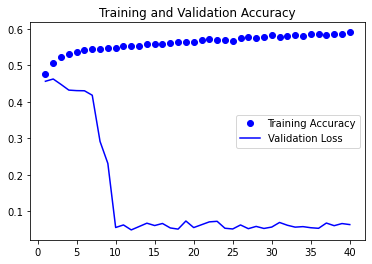

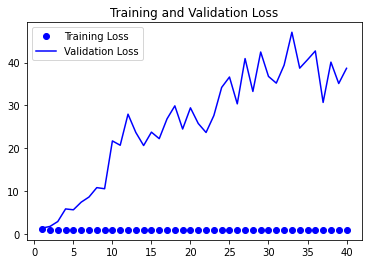

In [72]:
# -----------------------------------------------------
# DISPLAYING CURVES OF LOSS & ACCURACY DURING TRAINING |
# -----------------------------------------------------

acc = history8.history['accuracy']
val_acc = history8.history['val_accuracy']
loss = history8.history['loss']
val_loss = history8.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Loss')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

In [73]:
# SGD optimizer with Nesterov Momentum, 
# Glorot Normal weight, relu activation then softmax, 
# 40 epochs, batch size=128, 
# 2 dropouts, 2 regularization 
# categorical_ crossentropy
# 6 dense layers
# lr = 0.01

model9 = keras.Sequential()
model9.add(layers.Dense(64, activation='relu', input_dim=10, kernel_initializer = 'glorot_normal'))
model9.add(layers.BatchNormalization())
model9.add(layers.Dropout(0.4))
model9.add(layers.Dense(48, activation='relu'))
model9.add(layers.BatchNormalization())
model9.add(layers.Dense(48, activation='relu'))
model9.add(layers.Dense(48, activation='relu'))
model9.add(layers.Dropout(0.4))
model9.add(layers.Dense(48, activation='relu'))
model9.add(layers.Dense(10, activation='softmax'))
model9.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_55 (Dense)             (None, 64)                704       
_________________________________________________________________
batch_normalization_7 (Batch (None, 64)                256       
_________________________________________________________________
dropout_8 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_56 (Dense)             (None, 48)                3120      
_________________________________________________________________
batch_normalization_8 (Batch (None, 48)                192       
_________________________________________________________________
dense_57 (Dense)             (None, 48)                2352      
_________________________________________________________________
dense_58 (Dense)             (None, 48)               

In [74]:
model9.compile(loss='sparse_categorical_crossentropy', 
              optimizer=optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=True, name="SGD"), 
              metrics=['accuracy'])

In [75]:
history9 = model9.fit(x_train, y_train, 
                    epochs = 40, 
                    batch_size = 128, 
                    verbose=1,
                    validation_data=(x_val,y_val),
                    shuffle=True)

Train on 20008 samples, validate on 5002 samples
Epoch 1/40
20008/20008 [==============================] - 6s 301us/sample - loss: 1.0953 - accuracy: 0.4790 - val_loss: 1.1188 - val_accuracy: 0.4512
Epoch 2/40
20008/20008 [==============================] - 3s 141us/sample - loss: 0.9959 - accuracy: 0.4899 - val_loss: 1.2708 - val_accuracy: 0.4508
Epoch 3/40
20008/20008 [==============================] - 3s 159us/sample - loss: 0.9867 - accuracy: 0.4961 - val_loss: 1.6209 - val_accuracy: 0.4830
Epoch 4/40
20008/20008 [==============================] - 3s 154us/sample - loss: 0.9825 - accuracy: 0.5055 - val_loss: 1.6169 - val_accuracy: 0.4764
Epoch 5/40
20008/20008 [==============================] - 3s 152us/sample - loss: 0.9778 - accuracy: 0.5148 - val_loss: 1.8140 - val_accuracy: 0.4666
Epoch 6/40
20008/20008 [==============================] - 3s 140us/sample - loss: 0.9746 - accuracy: 0.5195 - val_loss: 1.8777 - val_accuracy: 0.4470
Epoch 7/40
20008/20008 [===========================

In [76]:
# output validation loss and accuracy
score = model9.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.9459589734611511
Test accuracy: 0.550185


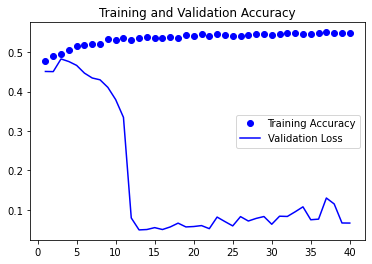

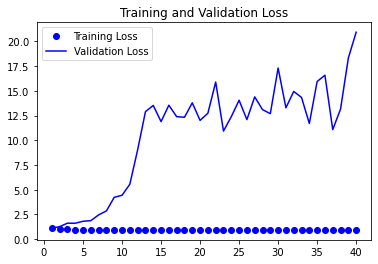

In [77]:
# -----------------------------------------------------
# DISPLAYING CURVES OF LOSS & ACCURACY DURING TRAINING |
# -----------------------------------------------------

acc = history9.history['accuracy']
val_acc = history9.history['val_accuracy']
loss = history9.history['loss']
val_loss = history9.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Loss')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

In [78]:
# SGD optimizer with Nesterov Momentum, 
# Glorot Normal weight, relu activation then softmax, 
# 40 epochs, batch size=128, 
# 2 dropouts, 2 regularization 
# categorical_ crossentropy
# 6 dense layers
# lr = 0.1

model10 = keras.Sequential()
model10.add(layers.Dense(64, activation='relu', input_dim=10, kernel_initializer = 'glorot_normal'))
model10.add(layers.BatchNormalization())
model10.add(layers.Dropout(0.4))
model10.add(layers.Dense(48, activation='relu'))
model10.add(layers.BatchNormalization())
model10.add(layers.Dense(48, activation='relu'))
model10.add(layers.Dense(48, activation='relu'))
model10.add(layers.Dropout(0.4))
model10.add(layers.Dense(48, activation='relu'))
model10.add(layers.Dense(10, activation='softmax'))
model10.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_61 (Dense)             (None, 64)                704       
_________________________________________________________________
batch_normalization_9 (Batch (None, 64)                256       
_________________________________________________________________
dropout_10 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_62 (Dense)             (None, 48)                3120      
_________________________________________________________________
batch_normalization_10 (Batc (None, 48)                192       
_________________________________________________________________
dense_63 (Dense)             (None, 48)                2352      
_________________________________________________________________
dense_64 (Dense)             (None, 48)               

In [79]:
model10.compile(loss='sparse_categorical_crossentropy', 
              optimizer=optimizers.SGD(learning_rate=0.1, momentum=0.9, nesterov=True, name="SGD"), 
              metrics=['accuracy'])

In [80]:
history10 = model10.fit(x_train, y_train, 
                    epochs = 40, 
                    batch_size = 128, 
                    verbose=1,
                    validation_data=(x_val,y_val),
                    shuffle=True)

Train on 20008 samples, validate on 5002 samples
Epoch 1/40
20008/20008 [==============================] - 6s 292us/sample - loss: 1.0230 - accuracy: 0.4865 - val_loss: 1.2503 - val_accuracy: 0.4320
Epoch 2/40
20008/20008 [==============================] - 3s 133us/sample - loss: 0.9713 - accuracy: 0.5224 - val_loss: 4.6429 - val_accuracy: 0.0966
Epoch 3/40
20008/20008 [==============================] - 3s 131us/sample - loss: 0.9625 - accuracy: 0.5389 - val_loss: 4.1959 - val_accuracy: 0.2007
Epoch 4/40
20008/20008 [==============================] - 3s 133us/sample - loss: 0.9637 - accuracy: 0.5314 - val_loss: 6.4935 - val_accuracy: 0.0854
Epoch 5/40
20008/20008 [==============================] - 3s 129us/sample - loss: 0.9619 - accuracy: 0.5370 - val_loss: 1.6063 - val_accuracy: 0.4536
Epoch 6/40
20008/20008 [==============================] - 3s 131us/sample - loss: 0.9593 - accuracy: 0.5369 - val_loss: 3.2108 - val_accuracy: 0.1689
Epoch 7/40
20008/20008 [===========================

In [81]:
# output validation loss and accuracy
score = model10.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.9464888106422424
Test accuracy: 0.542953


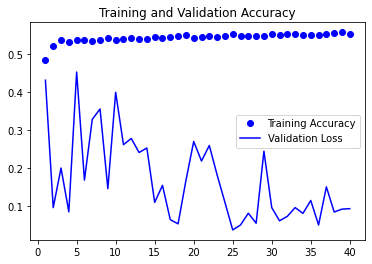

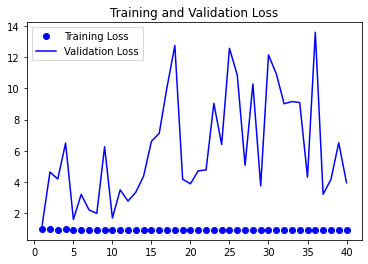

In [82]:
# -----------------------------------------------------
# DISPLAYING CURVES OF LOSS & ACCURACY DURING TRAINING |
# -----------------------------------------------------

acc = history10.history['accuracy']
val_acc = history10.history['val_accuracy']
loss = history10.history['loss']
val_loss = history10.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Loss')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

In [83]:
# SGD optimizer with Nesterov Momentum, 
# Glorot Normal weight, relu activation then softmax, 
# 40 epochs, batch size=128, 
# 2 dropouts, 2 regularization 
# categorical_ crossentropy
# 6 dense layers
# lr = 0.01

model11 = keras.Sequential()
model11.add(layers.Dense(64, activation='relu', input_dim=10, kernel_initializer = 'glorot_normal'))
model11.add(layers.BatchNormalization())
model11.add(layers.Dropout(0.5))
model11.add(layers.Dense(48, activation='relu'))
model11.add(layers.BatchNormalization())
model11.add(layers.Dense(48, activation='relu'))
model11.add(layers.Dense(48, activation='relu'))
model11.add(layers.Dropout(0.5))
model11.add(layers.Dense(48, activation='relu'))
model11.add(layers.Dense(10, activation='softmax'))
model11.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_67 (Dense)             (None, 64)                704       
_________________________________________________________________
batch_normalization_11 (Batc (None, 64)                256       
_________________________________________________________________
dropout_12 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_68 (Dense)             (None, 48)                3120      
_________________________________________________________________
batch_normalization_12 (Batc (None, 48)                192       
_________________________________________________________________
dense_69 (Dense)             (None, 48)                2352      
_________________________________________________________________
dense_70 (Dense)             (None, 48)              

In [84]:
model11.compile(loss='sparse_categorical_crossentropy', 
              optimizer=optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=True, name="SGD"), 
              metrics=['accuracy'])

In [85]:
history11 = model11.fit(x_train, y_train, 
                    epochs = 40, 
                    batch_size = 128, 
                    verbose=1,
                    validation_data=(x_val,y_val),
                    shuffle=True)

Train on 20008 samples, validate on 5002 samples
Epoch 1/40
20008/20008 [==============================] - 6s 295us/sample - loss: 1.1331 - accuracy: 0.4681 - val_loss: 1.0490 - val_accuracy: 0.4472
Epoch 2/40
20008/20008 [==============================] - 3s 141us/sample - loss: 1.0047 - accuracy: 0.4878 - val_loss: 1.1399 - val_accuracy: 0.4890
Epoch 3/40
20008/20008 [==============================] - 3s 142us/sample - loss: 0.9937 - accuracy: 0.4915 - val_loss: 1.3451 - val_accuracy: 0.4738
Epoch 4/40
20008/20008 [==============================] - 3s 140us/sample - loss: 0.9912 - accuracy: 0.4945 - val_loss: 1.4042 - val_accuracy: 0.4890
Epoch 5/40
20008/20008 [==============================] - 3s 136us/sample - loss: 0.9891 - accuracy: 0.4962 - val_loss: 1.4333 - val_accuracy: 0.4578
Epoch 6/40
20008/20008 [==============================] - 3s 132us/sample - loss: 0.9842 - accuracy: 0.5008 - val_loss: 1.4972 - val_accuracy: 0.4896
Epoch 7/40
20008/20008 [===========================

In [86]:
# output validation loss and accuracy
score = model11.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.9587330253314972
Test accuracy: 0.544932


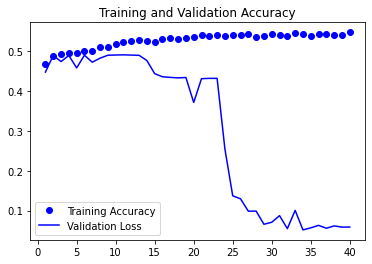

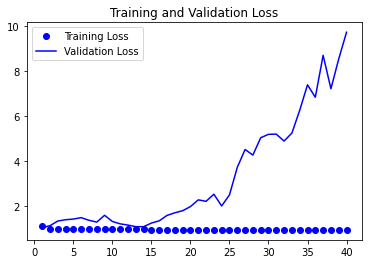

In [87]:
# -----------------------------------------------------
# DISPLAYING CURVES OF LOSS & ACCURACY DURING TRAINING |
# -----------------------------------------------------

acc = history11.history['accuracy']
val_acc = history11.history['val_accuracy']
loss = history11.history['loss']
val_loss = history11.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Loss')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

In [88]:
# SGD optimizer with Nesterov Momentum, 
# Glorot Normal weight, relu activation then softmax, 
# 40 epochs, batch size=128, 
# 1 dropouts, 2 regularization, no minibatch nor minibatch norm, 
# sparse_categorical_ crossentropy
# 6 dense layers
# lr = 0.001

model12 = keras.Sequential()
model12.add(layers.Dense(64, activation='relu', input_dim=10, kernel_initializer = 'glorot_normal'))
model12.add(layers.BatchNormalization())
model12.add(layers.Dropout(0.5))
model12.add(layers.Dense(48, activation='relu'))
model12.add(layers.BatchNormalization())
model12.add(layers.Dense(48, activation='relu'))
model12.add(layers.Dense(48, activation='relu'))
model12.add(layers.Dropout(0.5))
model12.add(layers.Dense(48, activation='relu'))
model12.add(layers.Dense(10, activation='softmax'))
model12.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_73 (Dense)             (None, 64)                704       
_________________________________________________________________
batch_normalization_13 (Batc (None, 64)                256       
_________________________________________________________________
dropout_14 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_74 (Dense)             (None, 48)                3120      
_________________________________________________________________
batch_normalization_14 (Batc (None, 48)                192       
_________________________________________________________________
dense_75 (Dense)             (None, 48)                2352      
_________________________________________________________________
dense_76 (Dense)             (None, 48)              

In [89]:
model12.compile(loss='sparse_categorical_crossentropy', 
              optimizer=optimizers.SGD(learning_rate=0.001, momentum=0.9, nesterov=True, name="SGD"), 
              metrics=['accuracy'])

In [90]:
history12 = model12.fit(x_train, y_train, 
                    epochs = 40, 
                    batch_size = 128, 
                    verbose=1,
                    validation_data=(x_val,y_val),
                    shuffle=True)

Train on 20008 samples, validate on 5002 samples
Epoch 1/40
20008/20008 [==============================] - 6s 316us/sample - loss: 1.5252 - accuracy: 0.4335 - val_loss: 1.7909 - val_accuracy: 0.4624
Epoch 2/40
20008/20008 [==============================] - 3s 140us/sample - loss: 1.1384 - accuracy: 0.4810 - val_loss: 2.7967 - val_accuracy: 0.4348
Epoch 3/40
20008/20008 [==============================] - 3s 148us/sample - loss: 1.0802 - accuracy: 0.4804 - val_loss: 3.5271 - val_accuracy: 0.4396
Epoch 4/40
20008/20008 [==============================] - 3s 151us/sample - loss: 1.0483 - accuracy: 0.4836 - val_loss: 3.9254 - val_accuracy: 0.4350
Epoch 5/40
20008/20008 [==============================] - 3s 148us/sample - loss: 1.0435 - accuracy: 0.4833 - val_loss: 4.1511 - val_accuracy: 0.4312
Epoch 6/40
20008/20008 [==============================] - 3s 144us/sample - loss: 1.0258 - accuracy: 0.4844 - val_loss: 3.8933 - val_accuracy: 0.4318
Epoch 7/40
20008/20008 [===========================

In [91]:
# output validation loss and accuracy
score = model12.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.9678692196922303
Test accuracy: 0.535291


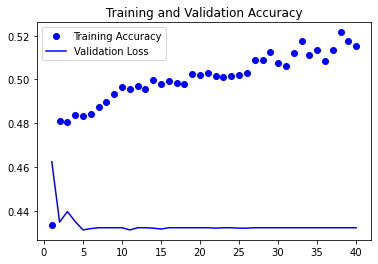

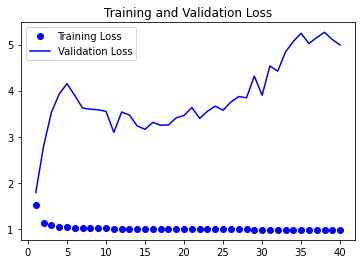

In [92]:
# -----------------------------------------------------
# DISPLAYING CURVES OF LOSS & ACCURACY DURING TRAINING |
# -----------------------------------------------------

acc = history12.history['accuracy']
val_acc = history12.history['val_accuracy']
loss = history12.history['loss']
val_loss = history12.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Loss')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

In [93]:
# SGD optimizer with Nesterov Momentum, 
# Glorot Normal weight, relu activation then softmax, 
# 40 epochs, batch size=128, 
# 1 dropouts, 2 regularization
# sparse_categorical_ crossentropy
# 6 dense layers
# lr = 0.001

model13 = keras.Sequential()
model13.add(layers.Dense(64, activation='relu', input_dim=10, kernel_initializer = 'glorot_normal'))
model13.add(layers.BatchNormalization())
model13.add(layers.Dropout(0.5))
model13.add(layers.Dense(48, activation='relu'))
model13.add(layers.BatchNormalization())
model13.add(layers.Dense(48, activation='relu'))
model13.add(layers.Dense(48, activation='relu'))
model13.add(layers.Dropout(0.5))
model13.add(layers.Dense(48, activation='relu'))
model13.add(layers.Dense(10, activation='softmax'))
model13.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_79 (Dense)             (None, 64)                704       
_________________________________________________________________
batch_normalization_15 (Batc (None, 64)                256       
_________________________________________________________________
dropout_16 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_80 (Dense)             (None, 48)                3120      
_________________________________________________________________
batch_normalization_16 (Batc (None, 48)                192       
_________________________________________________________________
dense_81 (Dense)             (None, 48)                2352      
_________________________________________________________________
dense_82 (Dense)             (None, 48)              

In [94]:
model13.compile(loss='sparse_categorical_crossentropy', 
              optimizer=optimizers.SGD(learning_rate=0.0001, momentum=0.9, nesterov=True, name="SGD"), 
              metrics=['accuracy'])

In [95]:
history13 = model13.fit(x_train, y_train, 
                    epochs = 40, 
                    batch_size = 128, 
                    verbose=1,
                    validation_data=(x_val,y_val),
                    shuffle=True)

Train on 20008 samples, validate on 5002 samples
Epoch 1/40
20008/20008 [==============================] - 6s 296us/sample - loss: 2.0926 - accuracy: 0.2346 - val_loss: 1.3232 - val_accuracy: 0.4868
Epoch 2/40
20008/20008 [==============================] - 3s 141us/sample - loss: 1.7515 - accuracy: 0.4184 - val_loss: 2.3095 - val_accuracy: 0.4930
Epoch 3/40
20008/20008 [==============================] - 3s 144us/sample - loss: 1.5138 - accuracy: 0.4643 - val_loss: 5.0761 - val_accuracy: 0.4900
Epoch 4/40
20008/20008 [==============================] - 3s 143us/sample - loss: 1.3714 - accuracy: 0.4689 - val_loss: 7.2141 - val_accuracy: 0.4894
Epoch 5/40
20008/20008 [==============================] - 3s 154us/sample - loss: 1.2883 - accuracy: 0.4737 - val_loss: 8.0967 - val_accuracy: 0.4898
Epoch 6/40
20008/20008 [==============================] - 3s 153us/sample - loss: 1.2375 - accuracy: 0.4730 - val_loss: 7.9927 - val_accuracy: 0.4896
Epoch 7/40
20008/20008 [===========================

In [96]:
# output validation loss and accuracy
score = model13.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.0185394550971985
Test accuracy: 0.499999


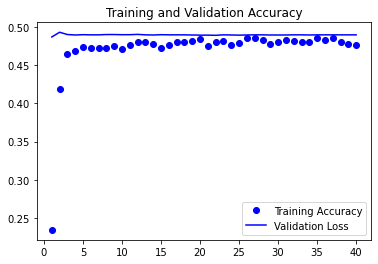

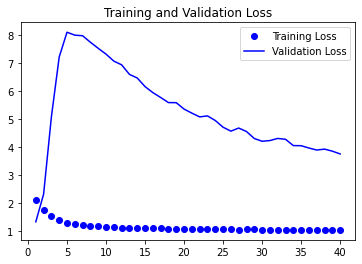

In [97]:
# -----------------------------------------------------
# DISPLAYING CURVES OF LOSS & ACCURACY DURING TRAINING |
# -----------------------------------------------------

acc = history13.history['accuracy']
val_acc = history13.history['val_accuracy']
loss = history13.history['loss']
val_loss = history13.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Loss')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

In [ ]:
# ROC AUC Curve

y = label_binarize
n_classes = 10

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()
  

In [ ]:
# Generate confusion matrix
matrix = plot_confusion_matrix(model, x_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize='true')
plt.title('Confusion matrix for our classifier')
plt.show(matrix)
plt.show()